In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten
from sklearn.metrics import confusion_matrix,classification_report
import os
import cv2 as cv
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Data Input

In [2]:
path_dir = "C:/Users/KIRPAL SINGH/Desktop/Projects/Plant disease prediction/input"

In [3]:
Categories = ["Apple___Apple_scab" , "Apple___Black_rot" , "Apple___Cedar_apple_rust" , "Apple___healthy"]

In [4]:
data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_dir , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array , (64,64))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [5]:
data

[[array([[170, 168, 170, ..., 189, 189, 187],
         [173, 174, 172, ..., 188, 187, 186],
         [168, 169, 172, ..., 186, 184, 181],
         ...,
         [102, 101,  99, ..., 115, 119, 117],
         [102, 102,  92, ..., 115, 113, 113],
         [100,  97,  93, ..., 113, 113, 116]], dtype=uint8),
  'Apple___Apple_scab'],
 [array([[132, 131, 133, ..., 128, 126, 124],
         [129, 131, 131, ..., 128, 128, 126],
         [131, 133, 132, ..., 127, 128, 130],
         ...,
         [ 60,  56,  59, ...,  88,  85,  90],
         [ 44,  46,  48, ...,  85,  84,  90],
         [ 40,  38,  39, ...,  84,  84,  87]], dtype=uint8),
  'Apple___Apple_scab'],
 [array([[ 37,  42,  54, ..., 130, 128, 134],
         [ 35,  43,  52, ..., 130, 134, 128],
         [ 34,  45,  57, ..., 130, 133, 133],
         ...,
         [ 82,  86,  88, ..., 125, 129, 129],
         [ 84,  85,  85, ..., 130, 128, 126],
         [ 85,  89,  89, ..., 130, 126, 125]], dtype=uint8),
  'Apple___Apple_scab'],
 [array([[

# data preparation

In [6]:
random.shuffle(data)

In [7]:
X = []
Y = []
for features,labels in data:
    X.append(features)
    Y.append(labels)

In [8]:
X = np.array(X)

In [9]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
len(Y)

7771

In [11]:
len(X)

7771

pixel normalization 

In [12]:
X = X/255

# splitting the data 

In [13]:
y_in = pd.get_dummies(Y)

In [14]:
x_train,x_rem,y_train,y_rem=train_test_split(X,Y,test_size=0.3,random_state=200)
x_test,x_val,y_test,y_val = train_test_split(x_rem,y_rem,test_size=0.5,random_state=255)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5439, 64, 64)
(5439,)
(1166, 64, 64)
(1166,)
(1166, 64, 64)
(1166,)


C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

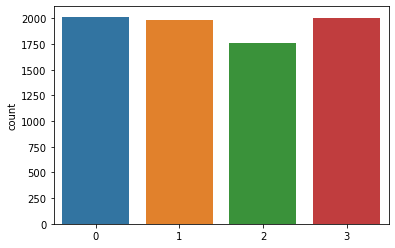

In [16]:
sns.countplot(Y)

as we can see that the traget variable is almost balanced so we are good to go with the model building

# model building

In [17]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , input_shape=(64,64,1), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(256 , (5,5), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(4,activation="softmax"))

In [18]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

Epoch 1/15
170/170 [==============================] - 63s 354ms/step - loss: 1.3864 - accuracy: 0.4881 - val_loss: 1.4719 - val_accuracy: 0.2736
Epoch 2/15
170/170 [==============================] - 49s 289ms/step - loss: 0.9341 - accuracy: 0.6202 - val_loss: 1.2417 - val_accuracy: 0.3491
Epoch 3/15
170/170 [==============================] - 49s 289ms/step - loss: 0.7266 - accuracy: 0.7088 - val_loss: 1.6583 - val_accuracy: 0.4177
Epoch 4/15
170/170 [==============================] - 49s 290ms/step - loss: 0.6159 - accuracy: 0.7656 - val_loss: 1.1127 - val_accuracy: 0.5943
Epoch 5/15
170/170 [==============================] - 53s 310ms/step - loss: 0.5128 - accuracy: 0.8097 - val_loss: 1.2321 - val_accuracy: 0.6235
Epoch 6/15
170/170 [==============================] - 52s 303ms/step - loss: 0.4449 - accuracy: 0.8404 - val_loss: 0.6093 - val_accuracy: 0.7830
Epoch 7/15
170/170 [==============================] - 45s 267ms/step - loss: 0.3886 - accuracy: 0.8634 - val_loss: 1.1266 - val_ac

# plotting the accuracy and loss curves

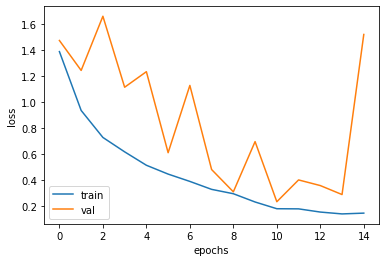

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","val"])

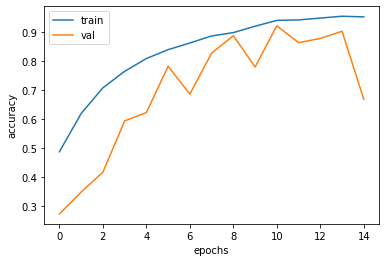

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","val"])

# Evaluating the model

In [22]:
model.evaluate(x_test,y_test)

37/37 [==============================] - 2s 47ms/step - loss: 1.3978 - accuracy: 0.6921


[1.3977699279785156, 0.6921097636222839]

In [23]:
y_pred = model.predict(x_test)

37/37 [==============================] - 2s 47ms/step


<AxesSubplot:>

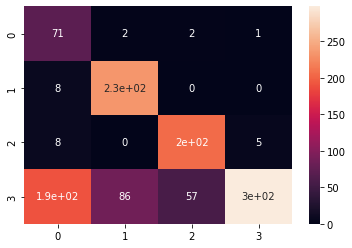

In [24]:
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),y_test),annot=True)

In [25]:
print(classification_report(y_pred.argmax(axis=1),y_test))

              precision    recall  f1-score   support

           0       0.26      0.93      0.40        76
           1       0.73      0.97      0.83       241
           2       0.78      0.94      0.85       218
           3       0.98      0.47      0.64       631

    accuracy                           0.69      1166
   macro avg       0.68      0.83      0.68      1166
weighted avg       0.84      0.69      0.70      1166

